In [62]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import sklearn
from sklearn import svm, metrics, datasets
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

In [33]:
# Getting and scaling data for faster computation
digits = load_digits()
scaled_data = scale(digits.data)

# get data classified labels
Y = digits.target

# Get number of classes in data
K = len(np.unique(Y))

In [34]:
# Getting data samples and feature information
samples, features = scaled_data.shape
# print(samples)
# print(features)

In [50]:
# Getting score of model
def bench_k_means(estimator, name, data, labels):
    estimator.fit(data)
    print(
        f"model name: {name} "
        f"\nestimator.inertia_: {estimator.inertia_}"
        f"\nhomogeneity_score: {metrics.homogeneity_score(labels, estimator.labels_)}"
        f"\ncompleteness_score: {metrics.completeness_score(labels, estimator.labels_)} "
        f"\nv_measure_score: {metrics.v_measure_score(labels, estimator.labels_)}"
        f"\nadjusted_rand_score: {metrics.adjusted_rand_score(labels, estimator.labels_)}"
        f"\nadjusted_mutual_info_score: {metrics.adjusted_mutual_info_score(labels, estimator.labels_)}"
        f"\nsilhouette_score: {metrics.silhouette_score(data, estimator.labels_,metric='euclidean')}")

In [51]:
# creating classifier 
centroid_location_generation_method = "random"
number_of_runs_with_different_centroid_locations = 10
classifier = KMeans(n_clusters=K, 
                    init=centroid_location_generation_method, 
                    n_init=number_of_runs_with_different_centroid_locations)

In [ ]:
# Plotting data/results source: 
# https://www.techwithtim.net/tutorials/machine-learning-python/k-means-2/

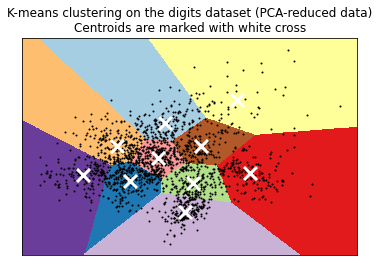

In [58]:
reduced_data = PCA(n_components=2).fit_transform(scaled_data)
kmeans = KMeans(init='k-means++', n_clusters=K, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [52]:
model_name = "first model"
bench_k_means(classifier,model_name,scaled_data, Y)

model name: 1 
estimator.inertia_: 69665.25597847962
homogeneity_score: 0.6733554662683986
completeness_score: 0.713821906086218 
v_measure_score: 0.6929984470398468
adjusted_rand_score: 0.5609326231285561
adjusted_mutual_info_score: 0.689802342200184
silhouette_score: 0.14495121975402708


In [61]:
print(tf.__version__)

2.6.0
